In [1]:
#importing libraries
import pandas as pd
import datetime
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import nltk
import os
import nltk.corpus
from nltk.tokenize import word_tokenize
import string
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import urllib.request
import time
import re
from requests import get
from collections import Counter
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import LinearSVC
import time
from sklearn.preprocessing import LabelEncoder as le
import statistics
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.multiclass import OneVsRestClassifier

In [3]:
df = pd.read_csv("newsCorpora.csv",error_bad_lines=False)

b'Skipping line 994: expected 4 fields, saw 5\nSkipping line 1146: expected 4 fields, saw 6\nSkipping line 1747: expected 4 fields, saw 6\nSkipping line 3870: expected 4 fields, saw 5\nSkipping line 4195: expected 4 fields, saw 5\nSkipping line 4283: expected 4 fields, saw 5\nSkipping line 4313: expected 4 fields, saw 5\nSkipping line 5279: expected 4 fields, saw 7\nSkipping line 6810: expected 4 fields, saw 5\nSkipping line 6913: expected 4 fields, saw 6\nSkipping line 7368: expected 4 fields, saw 5\nSkipping line 10698: expected 4 fields, saw 5\nSkipping line 10907: expected 4 fields, saw 5\nSkipping line 13732: expected 4 fields, saw 5\nSkipping line 14378: expected 4 fields, saw 5\nSkipping line 14642: expected 4 fields, saw 5\nSkipping line 15914: expected 4 fields, saw 5\nSkipping line 16329: expected 4 fields, saw 5\nSkipping line 17209: expected 4 fields, saw 5\nSkipping line 17638: expected 4 fields, saw 5\nSkipping line 17949: expected 4 fields, saw 5\nSkipping line 21717: ex

In [28]:
df.head() # not imported in a proper csv format to be done analysis on 

,no,Headline,Web_link,magazine,Category,Non,magazine_website,unix_time
0,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
1,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
2,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
3,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027
4,6,Plosser: Fed May Have to Accelerate Tapering Pace,http://www.nasdaq.com/article/plosser-fed-may-...,NASDAQ,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.nasdaq.com,1394470372212


looking into the data and found it is to be done with a seperator

In [2]:
df = pd.read_csv("newsCorpora.csv", sep='\t' ,error_bad_lines=False) # reading csv and ignoring bad lines with a \t

In [3]:
df.columns = ['no','Headline','Web_link','magazine','Category','Non' , 'magazine_website', 'unix_time'] # reassigning columns

In [4]:
df.head()

,no,Headline,Web_link,magazine,Category,Non,magazine_website,unix_time
0,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
1,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
2,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
3,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027
4,6,Plosser: Fed May Have to Accelerate Tapering Pace,http://www.nasdaq.com/article/plosser-fed-may-...,NASDAQ,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.nasdaq.com,1394470372212


In [32]:
df.reset_index().head()

,index,no,Headline,Web_link,magazine,Category,Non,magazine_website,unix_time
0,0,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
1,1,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
2,2,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
3,3,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027
4,4,6,Plosser: Fed May Have to Accelerate Tapering Pace,http://www.nasdaq.com/article/plosser-fed-may-...,NASDAQ,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.nasdaq.com,1394470372212


## Data Cleaning

In [5]:
df1=df.drop(['Non'],axis=1) # droping columns which have no meaning

In [6]:
df1.isnull().sum() # looking for nan values

no                  0
Headline            0
Web_link            0
magazine            2
Category            0
magazine_website    0
unix_time           0
dtype: int64

In [7]:
e= df[df.magazine.isna()].magazine_website.tolist()

In [8]:
e

['denver.cbslocal.com', 'dfw.cbslocal.com']

In [9]:
f=[] # finding similar values and replacing nan values
for i in range(0,len(e)):
    f.append(df1[df1.magazine_website == e[i]].magazine.tolist()[i])

In [10]:
f

['CBS Local', 'CBS Local']

In [11]:
df1.isnull().sum()

no                  0
Headline            0
Web_link            0
magazine            2
Category            0
magazine_website    0
unix_time           0
dtype: int64

In [12]:
len(df.magazine.unique().tolist())

10986

Unix time 

In [13]:
df1['unix_time'].head() 

0    1394470371207
1    1394470371550
2    1394470371793
3    1394470372027
4    1394470372212
Name: unix_time, dtype: int64

In [14]:
df1["datetime"] = ""

In [15]:
df1['datetime'] = pd.to_datetime(df1['unix_time'], unit='ms') # changing epoch time into readable format

In [16]:
df1.tail(1000) # cheacking wheter all values are changed

,no,Headline,Web_link,magazine,Category,magazine_website,unix_time,datetime
421418,421938,John Stamos and producers looking into revivin...,http://thecelebritycafe.com/feature/2014/08/jo...,TheCelebrityCafe.com,e,thecelebritycafe.com,1409222393829,2014-08-28 10:39:53.829
421419,421939,'Full House' Reunion Happening? New Casting Re...,http://www.hollywoodtake.com/full-house-reunio...,Hollywood Take,e,www.hollywoodtake.com,1409222394035,2014-08-28 10:39:54.035
421420,421940,Full House Revival: Possibly on the Way!,http://www.thehollywoodgossip.com/2014/08/full...,The Hollywood Gossip,e,www.thehollywoodgossip.com,1409222394482,2014-08-28 10:39:54.482
421421,421941,Full House Might Be Coming Back,http://www.gossipcop.com/full-house-coming-bac...,Gossip Cop,e,www.gossipcop.com,1409222394700,2014-08-28 10:39:54.700
421422,421942,Breaking News: Full House Reunion Series Plann...,http://insidepulse.com/2014/08/26/breaking-new...,Inside Pulse,e,insidepulse.com,1409222394970,2014-08-28 10:39:54.970
421423,421943,Full House may be getting revived by Warner Bros,http://fansided.com/2014/08/26/full-house-new-...,FanSided,e,fansided.com,1409222395391,2014-08-28 10:39:55.391
421424,421944,Cut It Out! Full House Revival Closer Than Eve...,http://www.cinemablend.com/television/Cut-It-O...,Cinema Blend,e,www.cinemablend.com,1409222395644,2014-08-28 10:39:55.644
421425,421945,Full House reboot in development with many ori...,http://starcasm.net/archives/285347,Starcasm.net,e,starcasm.net,1409222395874,2014-08-28 10:39:55.874
421426,421946,God Help Us: Is Full House Really Coming Back ...,http://www.inquisitr.com/1434623/god-help-us-i...,The Inquisitr,e,www.inquisitr.com,1409222396234,2014-08-28 10:39:56.234
421427,421947,Report: 'Full House' Revival In The Works,http://www.etcanada.com/blogs/etc_109465/repor...,ETCanada.com \(blog\),e,www.etcanada.com,1409222396470,2014-08-28 10:39:56.470


In [17]:
type(df1["datetime"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [18]:
print("The data which we are conducting for this analysis is from " + str(df1["datetime"].dt.date[0]) + " to " + str(df1["datetime"].dt.date[len(df1)-1]))

The data which we are conducting for this analysis is from 2014-03-10 to 2014-08-28


In [19]:
df1['date'] = df1['datetime'].dt.date
df1['time'] = df1['datetime'].dt.time
df1['month'] = df1['datetime'].dt.month

In [20]:
df1 = df1.drop(["unix_time"],axis = 1)


## Exploratory Analysis

C:\Users\akhil\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0, 0.5, 'Number Of Posts'), Text(0.5, 0, 'Month')]

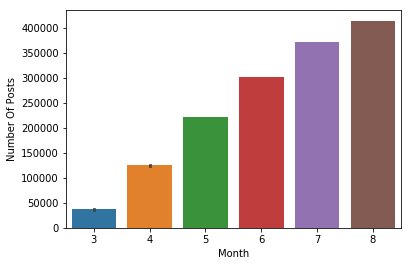

In [21]:
ax = sns.barplot(x="month", y="no", data=df1)
ax.set(xlabel="Month", ylabel = "Number Of Posts")
# number of posts from every month

For average number of articles might differ as the start date is from 10th of march which makes 20 days in the march and 28 days in august because it is till 28th

In [50]:
p=[]
months = [3,4,5,6,7,8]
days = [20,30,31,31,31,28]
for i in range (0,len(days)):
    p.append(len(df1[df1.month==i+3])/days[i])

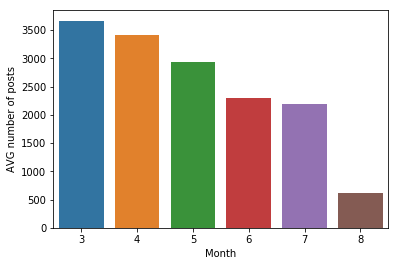

In [51]:
ax = sns.barplot(x=months, y= p)
ax.set(xlabel="Month", ylabel = "AVG number of posts")
# total average posts from various months
plt.show()

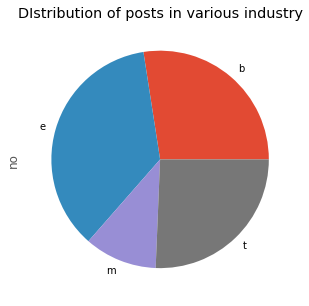

In [52]:
plt.style.use("ggplot")
# Category's distribution
ax = df1.groupby("Category").count()["no"].plot(kind="pie", 
                                                 figsize=(8, 5),
                                                 title="DIstribution of posts in various industry")
plt.show()
# distributions from various industry like entertainment, bussiness, medical, etc.,

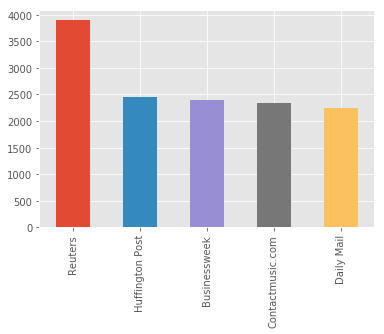

In [53]:
df1["magazine"].value_counts().head().plot(kind='bar')
# highest posted publiser

In [54]:
df2= df1.groupby(['Category','month'])['no'].count()

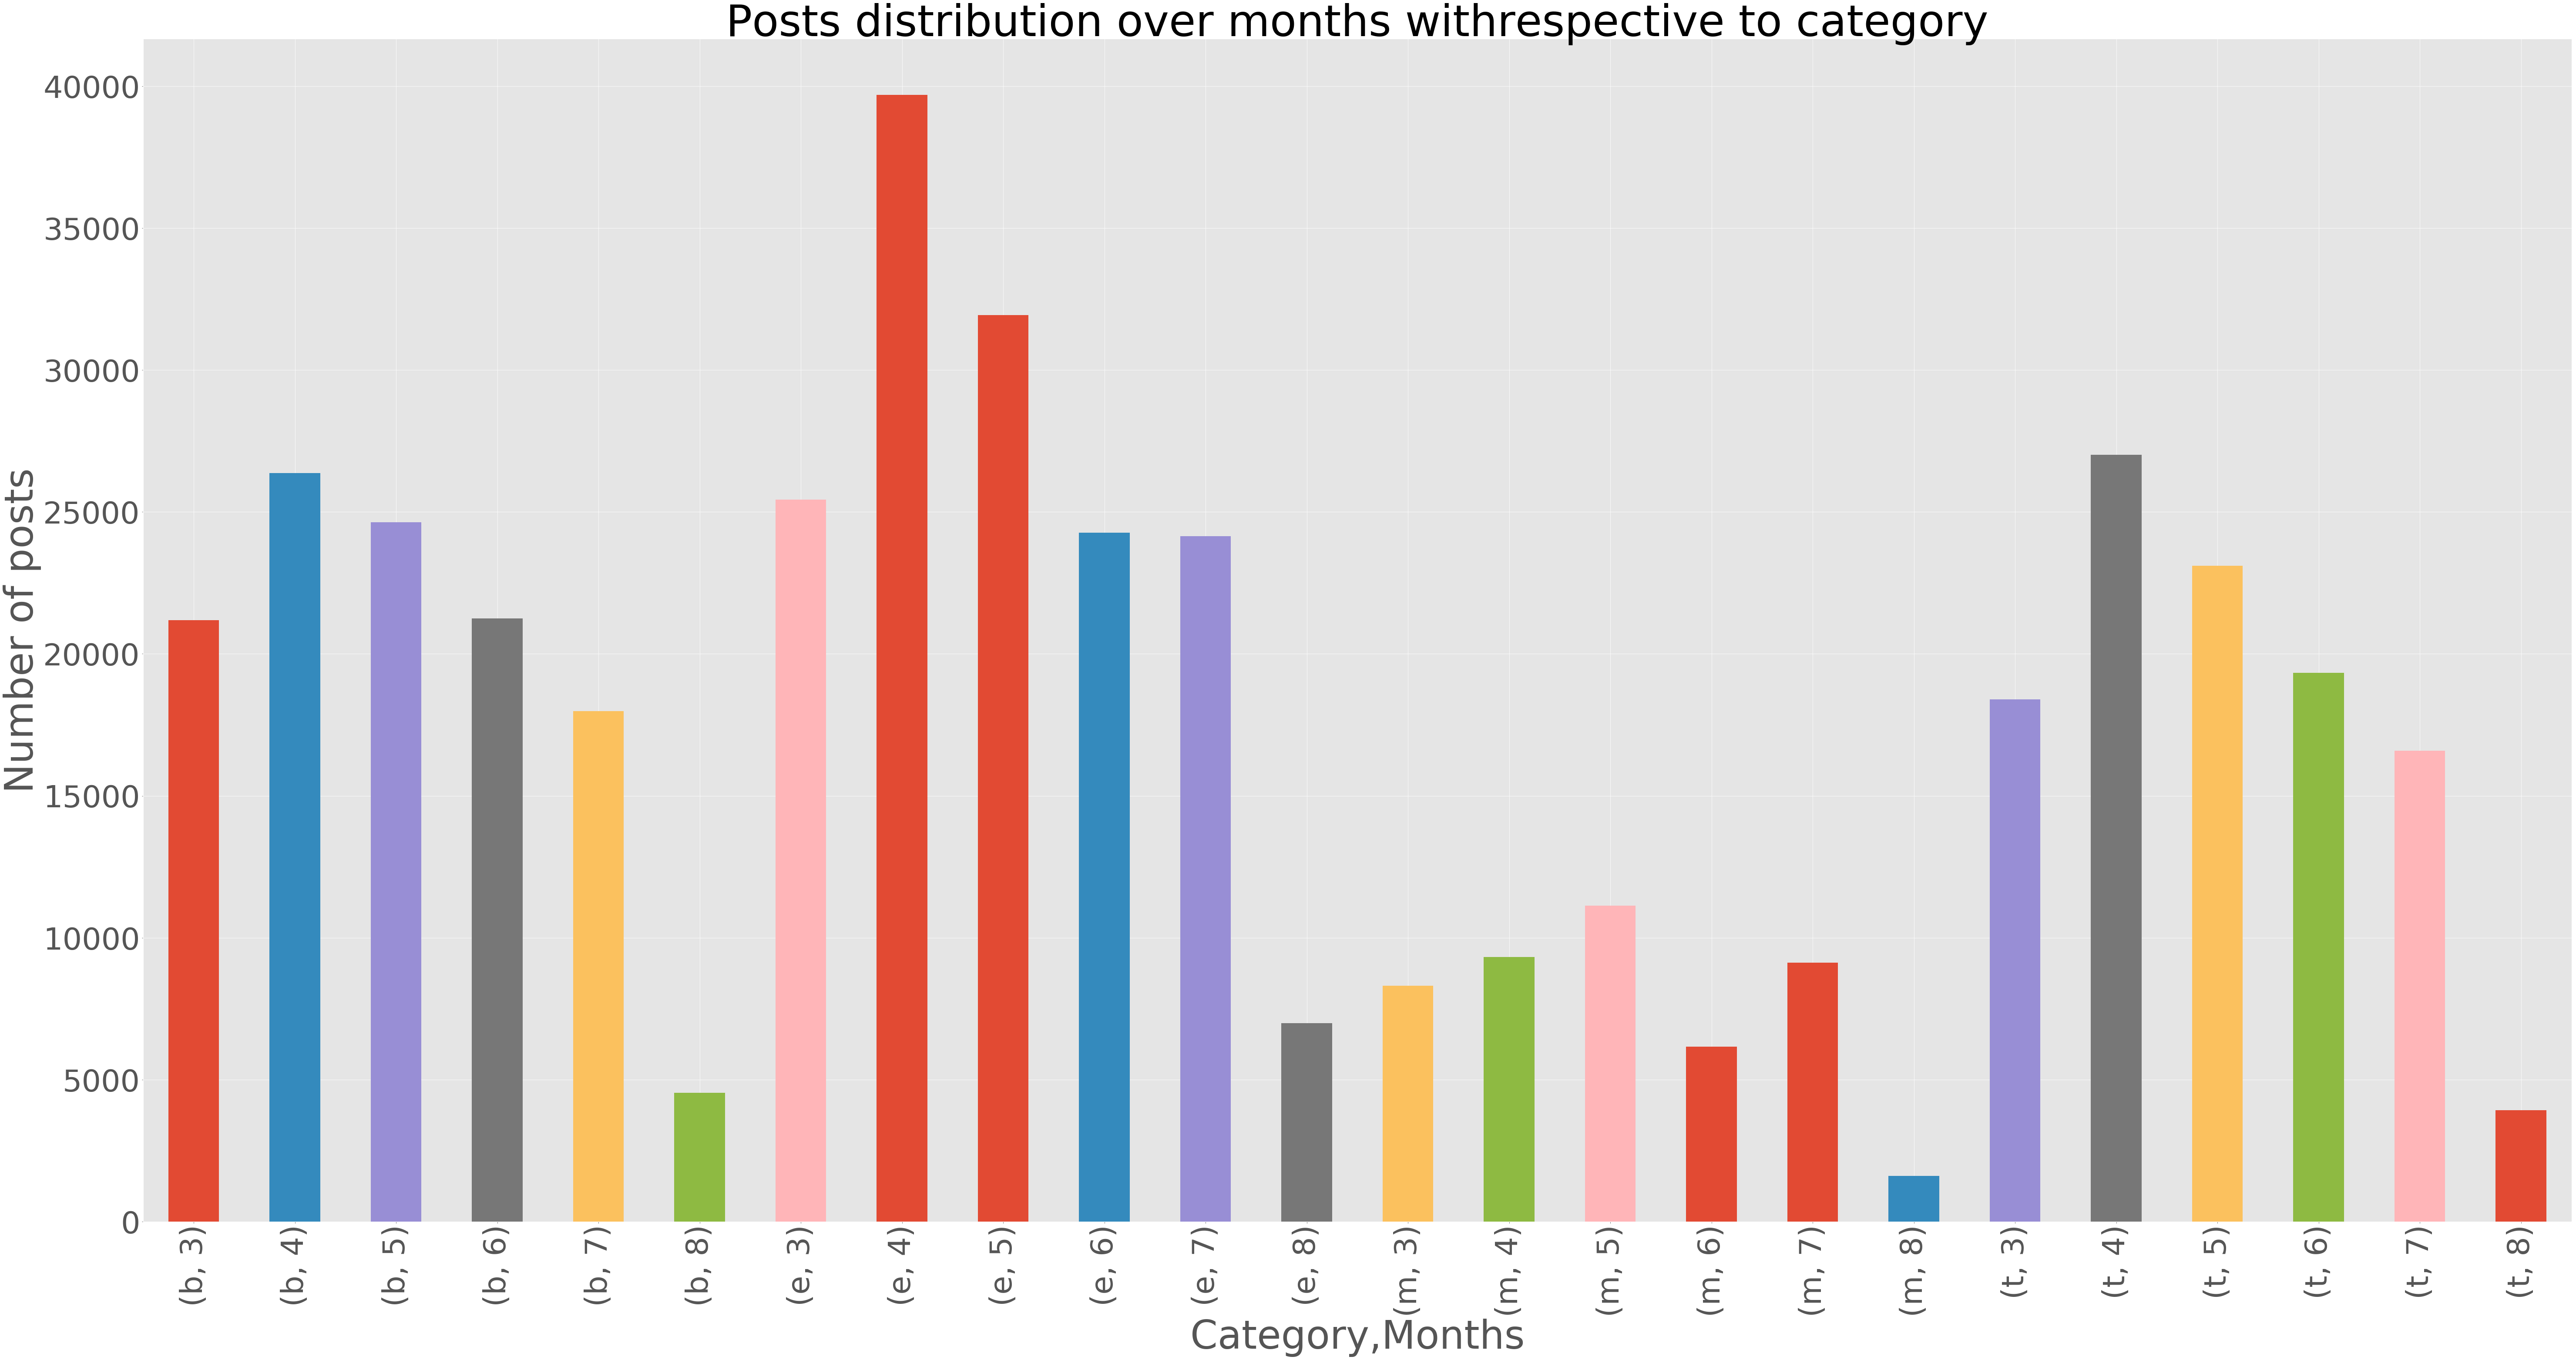

In [55]:
# posts from various industries from every month
fig, ax = plt.subplots(figsize=(100,50))
_=df2.plot(kind = 'bar',ax=ax)
_=plt.xlabel('Category,Months',fontsize=90)
_=plt.ylabel('Number of posts',fontsize=90)
_=plt.title('Posts distribution over months withrespective to category',fontsize=100)
_=plt.xticks(rotation='vertical',fontsize=70)
_=plt.yticks(fontsize=70)

## Text Cleaning

In [22]:
df1['Headline']=df1['Headline'].str.replace('\d+', '') # removing all the numbers in the text

In [23]:
df1['Headline']=df1['Headline'].str.lower()# converting everything into lower case

In [24]:
df1["Headline"]

0         fed's charles plosser sees high bar for change...
1         us open: stocks fall after fed official hints ...
2         fed risks falling 'behind the curve', charles ...
3         fed's plosser: nasty weather has curbed job gr...
4         plosser: fed may have to accelerate tapering pace
5                 fed's plosser: taper pace may be too slow
6         fed's plosser expects us unemployment to fall ...
7         us jobs growth last month hit by weather:fed p...
8         ecb unlikely to end sterilisation of smp purch...
9         ecb unlikely to end sterilization of smp purch...
10                    eu's half-baked bank union could work
11             europe reaches crunch point on banking union
12        ecb focus-stronger euro drowns out ecb's messa...
13               eu aims for deal on tackling failing banks
14        forex - pound drops to one-month lows against ...
15        noyer says strong euro creates unwarranted eco...
16        eu week ahead march -: bank re

## For deliverable 3

In [25]:
# removing puncuation ,marks
def remove_punctuation(t):
    no_punct = ''.join(p for p in t if p not in string.punctuation)
    return no_punct

In [26]:
df1['Headline']=df1['Headline'].apply(lambda x: remove_punctuation(x)) # removing all the puncuations

In [28]:
stop_words = set(stopwords.words('english')) # removing all the stop words
def cleaning(text):
    word_tokens = text.split(" ")
    # Remove stopwords
    word_tokens = [word for word in word_tokens if word not in stop_words]
    return " ".join(word_tokens)

In [29]:
df1['Headline']=df1['Headline'].apply(cleaning)

In [31]:
df1["Headline"] = df1["Headline"].apply(str)

In [32]:
# lemmetizing to decrease word count
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    Splits = text.split(" ")
    lem = [lemmatizer.lemmatize(w) for w in Splits]
    return " ".join(lem)

df1['Headline'] = df1.Headline.apply(lemmatize_text)

In [33]:
#stemming to decrease word count
porter_stemmer  = PorterStemmer()
def Stemming(text):
    Splits = text.split(" ")
    lem = [porter_stemmer.stem(w) for w in Splits]
    return " ".join(lem)
    
df1['Headline'] = df1.Headline.apply(Stemming)

In [34]:
df1["Headline"].head()

0    fed charl plosser see high bar chang pace taper
1    u open stock fall fed offici hint acceler taper
2        fed risk fall behind curv charl plosser say
3          fed plosser nasti weather curb job growth
4                 plosser fed may acceler taper pace
Name: Headline, dtype: object

In [35]:
df1['token'] = df1.apply(lambda row: nltk.word_tokenize(row['Headline']), axis=1) # tokenizing 

In [36]:
def totok():
    total = []
    for x in df1['token']:
        total += x
    counter = Counter(total)
    return counter.most_common(10)

In [37]:
# Top words in the whole article
print('Top repeated words:', totok())


Top repeated words: [('new', 24245), ('u', 19305), ('googl', 12536), ('say', 11152), ('appl', 10129), ('video', 9916), ('get', 9208), ('report', 8931), ('star', 8462), ('show', 8288)]


In [38]:
def tok(category):
    tokens = df1[df1['Category'] == category]['token']
    total = []
    for x in tokens:
        total += x
    counter = Counter(total)
    return counter.most_common(10)

In [39]:
# Getting top words in every category
for category in set(df1['Category']):
    print('category :', category + '\n' + 'Top repeated words:', tok(category) )


category : b
Top repeated words: [('u', 11197), ('stock', 6748), ('new', 4606), ('rate', 4602), ('china', 4173), ('bank', 3973), ('price', 3952), ('market', 3843), ('rise', 3629), ('sale', 3626)]
category : t
Top repeated words: [('googl', 11498), ('appl', 9247), ('new', 7981), ('samsung', 7672), ('microsoft', 6439), ('facebook', 5910), ('galaxi', 5859), ('launch', 4208), ('android', 4113), ('one', 3945)]
category : e
Top repeated words: [('new', 9103), ('star', 7922), ('video', 6543), ('kardashian', 6058), ('kim', 5797), ('season', 5495), ('show', 5134), ('movi', 5068), ('game', 5062), ('review', 4485)]
category : m
Top repeated words: [('ebola', 3685), ('studi', 3565), ('cancer', 2798), ('health', 2743), ('new', 2555), ('u', 2327), ('may', 2090), ('viru', 1977), ('mer', 1906), ('say', 1865)]


In [75]:
#test and train split
train_x, test_x,train_y, test_y= train_test_split(df1.Headline,df1.Category, random_state=3,test_size=0.20)

In [76]:
train_x.shape

(337934,)

In [77]:
test_x.shape

(84484,)

But with normal splitting many models of scikit are facing problems as they are expecting a numeric value instead of text data

In [78]:
count_vect = CountVectorizer()

In [80]:
# vectorizing to convert text into numerics
X = count_vect.fit_transform(df1.Headline)
y = le().fit_transform(df1['Category'])
train_x, test_x,train_y, test_y= train_test_split(X,y, random_state=3,test_size=0.20)

In [81]:
test_x.shape

(84484, 46218)

In [84]:
# applying multiclass classifier
clf = OneVsRestClassifier(LogisticRegression())

In [85]:
clf.fit(train_x,train_y)

C:\Users\akhil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          n_jobs=None)

In [86]:
# logistic reg accuracy
clf.score(test_x, test_y)

0.9433383835992614

Thought it is overfitting and quite didn't expect this better accuracy from basic regression model

In [87]:
# confusion matrix
test_y_real = clf.predict(test_x)
confusion_matrix(test_y,test_y_real)

array([[21395,   340,   177,  1224],
       [  367, 29623,   109,   272],
       [  361,   189,  8552,   130],
       [ 1158,   364,    96, 20127]], dtype=int64)

Confusion matric looks fine

In [88]:
#cross validation of logistic regression
n_samples = X.shape[0]
ss = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
p = cross_val_score(clf, X, y, cv=ss)

C:\Users\akhil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\akhil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\akhil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\akhil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\akhil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Cross validated to check that it is not over fitting

In [89]:
# mean of cross validation
print(statistics.mean(p))

0.9426195098085633


In [90]:
# naive bayes
mnb = MultinomialNB()
mnb.fit(train_x, train_y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [91]:
#naive bayes accuracy
mnb.score(test_x,test_y)

0.9219970645329293

In [92]:
test_y_real = mnb.predict(test_x)

In [93]:
# confusion matrix
confusion_matrix(test_y,test_y_real)

array([[20824,   400,   343,  1569],
       [  472, 29060,   216,   623],
       [  376,   285,  8404,   167],
       [ 1491,   422,   226, 19606]], dtype=int64)

### Confusion matrix seems good

In [95]:
#cross-validation of naive bayes
Cross = cross_val_score(mnb, train_x, train_y, cv=10)
print(statistics.mean(Cross))

0.9223428254762092


Cross validation also shows same results. So, naive bayes is not overfitting

## Decision Tree

In [96]:
# tried changing test and train size
train_x, test_x,train_y, test_y= train_test_split(X,y, random_state=3,test_size=0.50)

In [97]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=5) 
clf1 = clf_gini.fit(train_x, train_y)

In [98]:
# accuracy
clf1.score(test_x,test_y)

0.41969802423192193

Didn't get quite as expected

In [99]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 7, min_samples_leaf = 5) 
clf_1 = OneVsRestClassifier(clf_entropy)
clf2 = clf_1.fit(train_x, train_y) 

Applied multiclass operator to boost perforamnce

In [100]:
clf2.score(test_x,test_y)

0.5499718288519903

Not satifactory

Would like to work on this

In [106]:
# html parsing
def text(link):
    url = link
    htmlString = get(url).text
    html = BeautifulSoup(htmlString, 'lxml')
    entries = html.find_all('div', {'class':'StandardArticleBody_body'})
    text = [e.get_text() for e in entries]
    #print '{} posts were found.'.format(len(text))
    return text

In [107]:
def text1(link):
    url = link
    htmlString = get(url).text
    html = BeautifulSoup(htmlString, 'lxml')
    entries = html.find_all('div', {'itemprop':'articleBody'})
    text = [e.get_text() for e in entries]
    #print '{} posts were found.'.format(len(text))
    return text

In [108]:
df['Story'] = ''

In [112]:
# data retrival form website
%%time
t0 = time.time()
p1 = []
for i in range(0,len(df)):
    if df.magazine[i] == 'Reuters':
        j = df.Web_link[i]
        p1 = text(j)
        df['Story'][i] = p1
#    if df.magazine[i] == 'Daily Mail':
#        j = df.Web_link[i]
#        p1 = text1(j)
#        df['Story'][i] = p1
print(time.time() - t0)

C:\Users\akhil\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


4605.556126356125
Wall time: 1h 16min 45s


It takes quite a lot time. I would like to optimise the time to retrive as well as find a way to compare the article with limited resources as many websites are not actively monitored by the magazine pages